In [1]:
import numpy as np
import matplotlib.pyplot as plt
import hdf5storage
import mne

from fonet import fo_spike_detector

In [2]:
MAT_FILE = 'data_example.mat'

# Load FONet

In [3]:
#  Load FONet
model = fo_spike_detector(dropout_rate=0)
model.load_weights('FOnet.h5')

In [4]:
model.summary()

Model: "fo_spike_detector"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 1)]          0         
_________________________________________________________________
Conv1 (Conv1D)               (None, 256, 32)           1056      
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 32)           128       
_________________________________________________________________
activation (Activation)      (None, 256, 32)           0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 64, 32)            0         
_________________________________________________________________
Conv22 (Conv1D)              (None, 64, 64)            34880     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64)      

# Load Example mat file and apply FONet

In [5]:
#  Load Example mat file
m = hdf5storage.loadmat(MAT_FILE)
x_d =  np.expand_dims(m['data'], axis=0)

In [6]:
#  Epoch EEG data
n_samples = x_d.shape[1]
epoch_size = 64  # 250ms
window_size = 256 #  1s
delta = int((window_size-epoch_size)/2)
start_ids = np.arange(0, n_samples-window_size, epoch_size)  #  starting sample of each eeg epoch

#  Take an epoch with size 1s centered around each 250ms epoch
eeg_epochs = x_d[:, list(map(lambda x:np.arange(x,x+window_size), start_ids - delta))].transpose(1,0,2)

#  Apply FONet
y_pred = model.predict(np.squeeze(eeg_epochs))

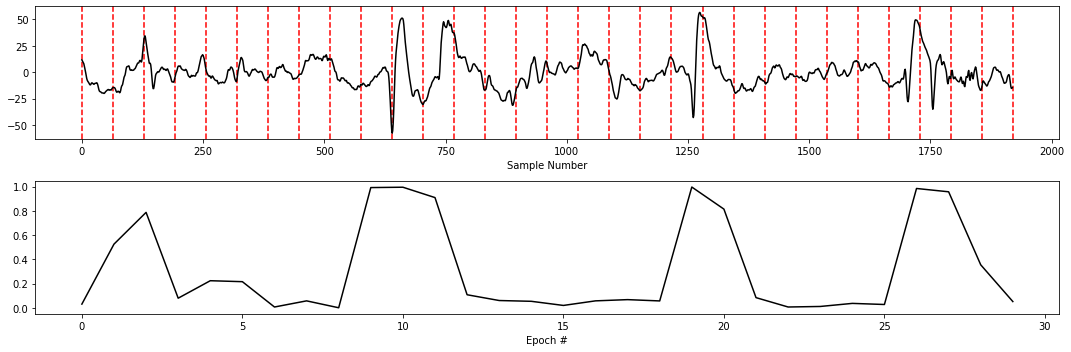

In [7]:
#  Plot Example Epochs and FOnet output
epoch_start = 100
epoch_end = 130

n_x = epoch_end - epoch_start

x = eeg_epochs[epoch_start:epoch_end]
y = y_pred[epoch_start:epoch_end]

fig, ax = plt.subplots(2, figsize=(15, 5))
for i in range(n_x+1):
    ax[0].axvline(i*64, linestyle='--', color='r')

ax[0].plot(np.squeeze(x_d[:, epoch_start*epoch_size:epoch_end*epoch_size]), color='black')
ax[1].plot(y, color='black')
ax[0].set_xlabel('Sample Number')
ax[1].set_xlabel('Epoch #')
fig.tight_layout()